# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))
suppressMessages(library(svglite))
suppressMessages(library(RColorBrewer))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))

[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘optparse’ was built under R version 4.3.3”
Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘ensembldb’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicFeatures’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationDbi’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationFilter’ was built under R version 4.3.2”
Warning message:
"package 'scDblFinder' was built under R ver

## Read the merged object filtered for doublets and clusterized at high resolution

In [2]:
setwd("/group/soranzo/manuel.tardaguila/2025_K562_multiome_reanalysis/processing_outputs/")

In [3]:
adata<-readRDS(file="merged_unprocessed_db_filt_clustered_QCed_reclustered.rds")

## Check initial metadata

In [4]:
metadata<-adata[[]]

In [5]:
cat("metadata_0\n")
cat(str(metadata))
cat("\n")
cat(str(row.names(metadata)))
cat("\n")


metadata_0
'data.frame':	42563 obs. of  61 variables:
 $ orig.ident                       : chr  "MCO_1278" "MCO_1278" "MCO_1278" "MCO_1278" ...
 $ nCount_RNA                       : num  20131 37354 40293 19368 13148 ...
 $ nFeature_RNA                     : int  5903 7954 7919 5970 4784 7284 5247 5587 5017 4046 ...
 $ percent.mt                       : num  0.457 0.361 0.541 0.423 0.548 ...
 $ nCount_RNA_raw                   : num  20627 37674 40650 19929 13810 ...
 $ nFeature_RNA_raw                 : int  5905 7954 7922 5977 4798 7285 5311 5592 5084 4202 ...
 $ nCount_ATAC                      : num  174530 439892 406774 8286 11580 ...
 $ nFeature_ATAC                    : int  36249 72733 70079 2064 2905 42352 30057 39576 33199 33501 ...
 $ gex_raw_reads                    : int  55696 99956 112159 51478 34690 81252 37384 41995 37238 30687 ...
 $ gex_mapped_reads                 : int  53947 96927 108799 49918 33634 78679 36228 40773 36065 29591 ...
 $ gex_conf_intergenic_reads  

# Graphs of clusterization

In [6]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_K562_multiome_reanalysis/processing_outputs/",'graphs_POST_QC_and_recluster','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

NULL

## Graph WNN by SampleID

png 
  2

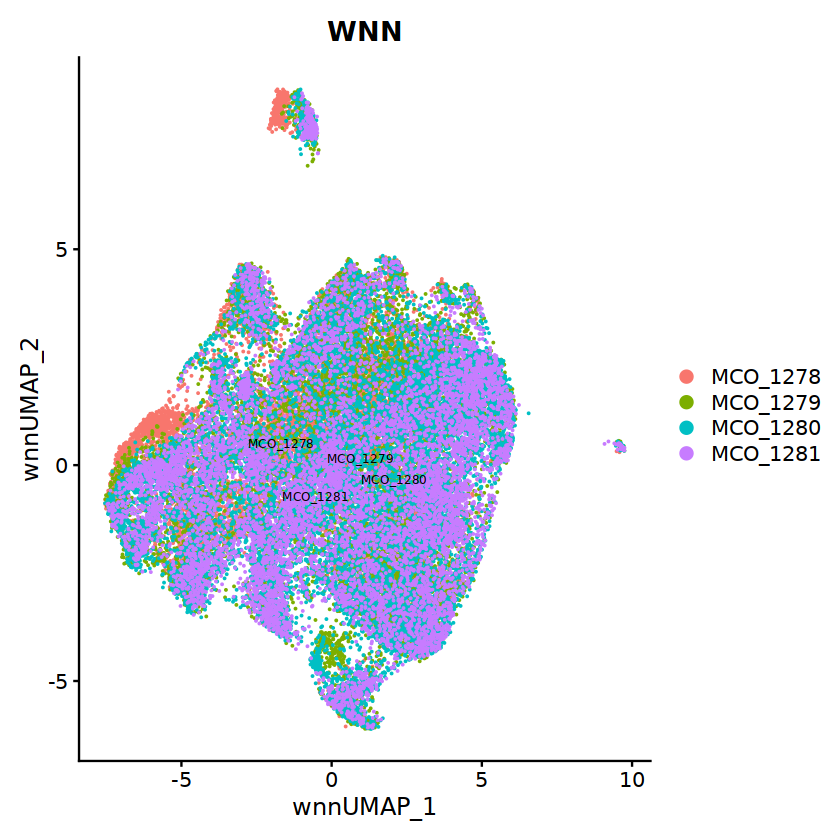

In [7]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "time_point", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_SampleID.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN by Seurat cluster

png 
  2

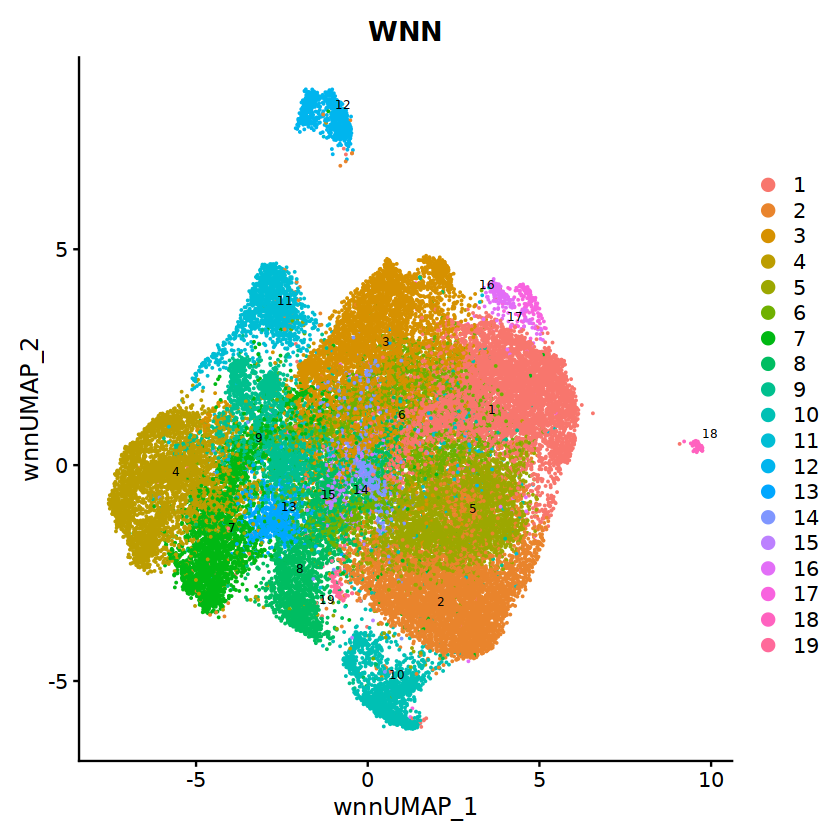

In [8]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "seurat_clusters", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_Seurat_cluster.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN_Intermediate_QC_metrics

png 
  2

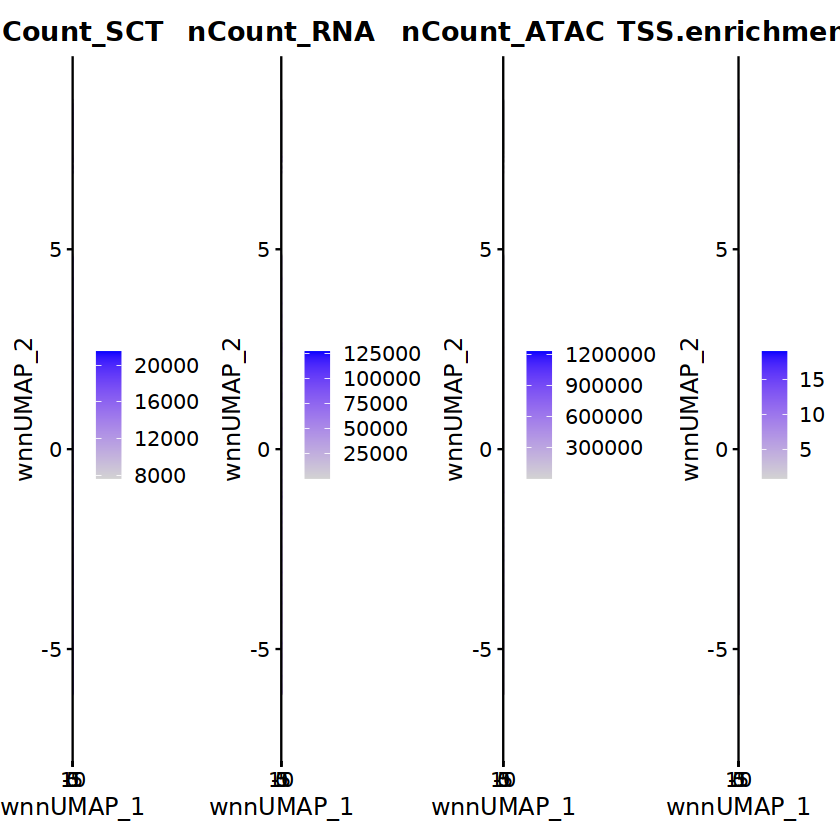

In [9]:
p6 <- FeaturePlot(adata, features = c("nCount_SCT", "nCount_RNA", "nCount_ATAC",'TSS.enrichment'), ncol = 4,
                  reduction = 'umap.wnn')

p6

setwd(path_graphs)
png(file='WNN_Intermediate_QC_metrics.png', width =1000, height = 500)
p6
dev.off()

png 
  2

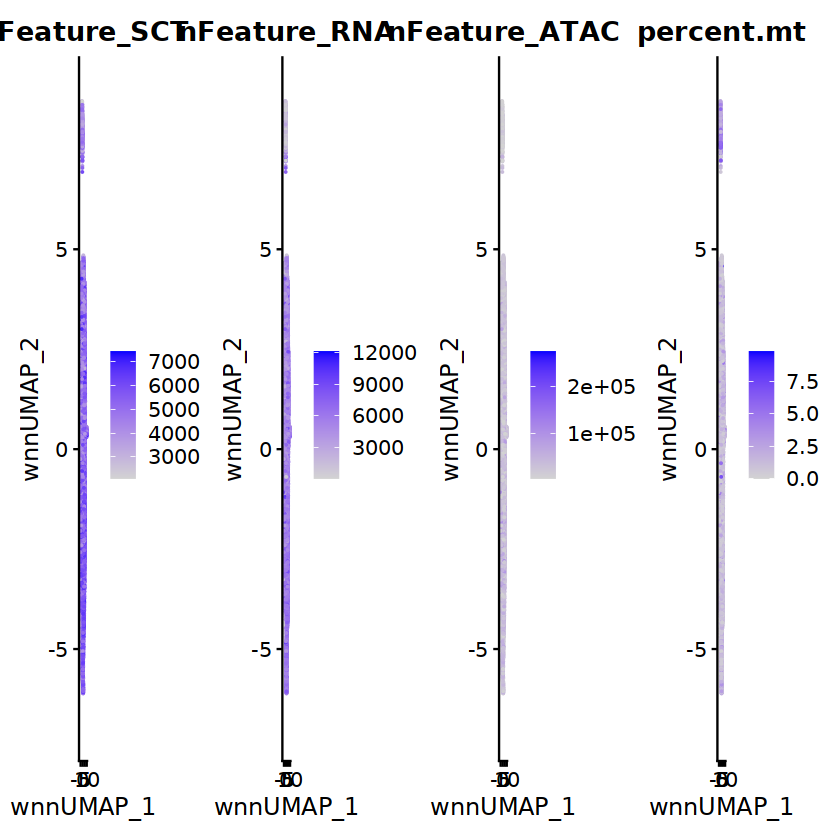

In [10]:
p6 <- FeaturePlot(adata, features = c("nFeature_SCT", "nFeature_RNA", "nFeature_ATAC",'percent.mt'), ncol = 4,
                  reduction = 'umap.wnn')

p6

setwd(path_graphs)
png(file='WNN_Intermediate_QC_metrics_2.png', width =1000, height = 500)
p6
dev.off()

## Graph WNN by marker genes

In [11]:
DefaultAssay(adata) <- 'SCT'

genes<-Features(adata)

str(genes)

 chr [1:31096] "MIR1302-2HG" "OR4F5" "AL627309.1" "AL627309.3" "AL627309.2" ...


In [12]:
genes[grep("GZM", genes)]

[1] "GZMA" "GZMB" "GZMM"

In [13]:
genes[grep("IFNG", genes)]

[1] "IFNGR1"   "IFNG-AS1" "IFNG"     "IFNGR2"

png 
  2

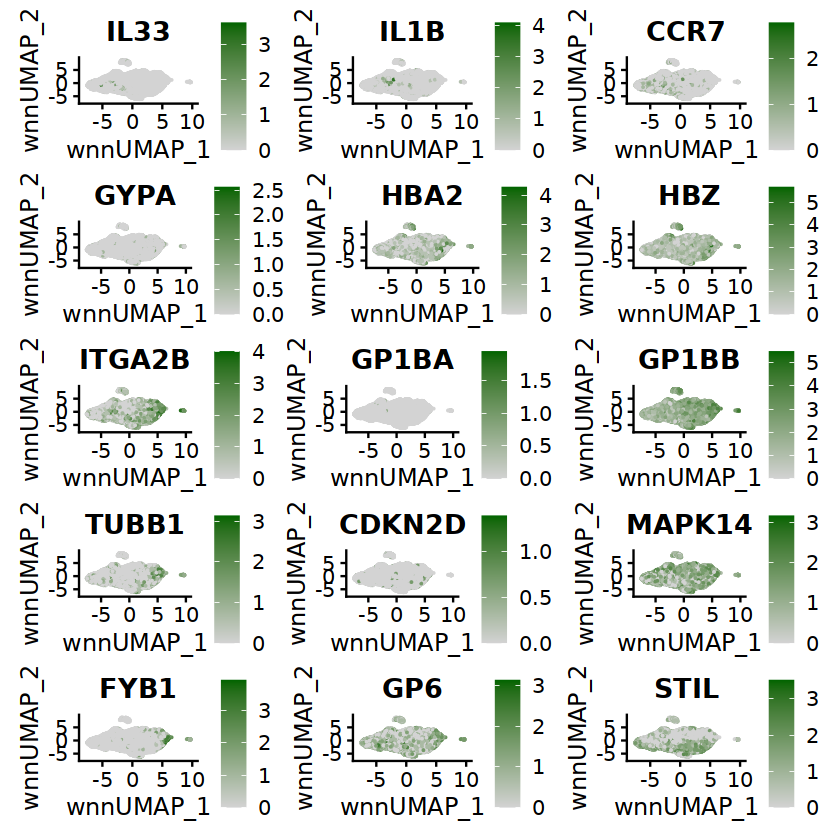

In [14]:
## Graph 

DefaultAssay(adata) <- 'SCT'


p5 <- FeaturePlot(adata, features = c('IL33','IL1B','CCR7'),
                  reduction = 'umap.wnn', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)


p5_1 <- FeaturePlot(adata, features = c('GYPA','HBA2','HBZ'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5_3 <- FeaturePlot(adata, features = c('ITGA2B','GP1BA', 'GP1BB'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_7 <- FeaturePlot(adata, features = c('FYB1','GP6','STIL'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_6 <- FeaturePlot(adata, features = c('TUBB1','CDKN2D','MAPK14'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)


p5 / p5_1 / p5_3 / p_6 / p_7

setwd(path_graphs)
png(file='UMAP_marker_genes.png', width =1000, height = 1500)
p5 / p5_1 / p5_3 / p_6 / p_7
dev.off()

# Violin graphs to decide if a cluster is lowQuality

## Percent.mt

png 
  2

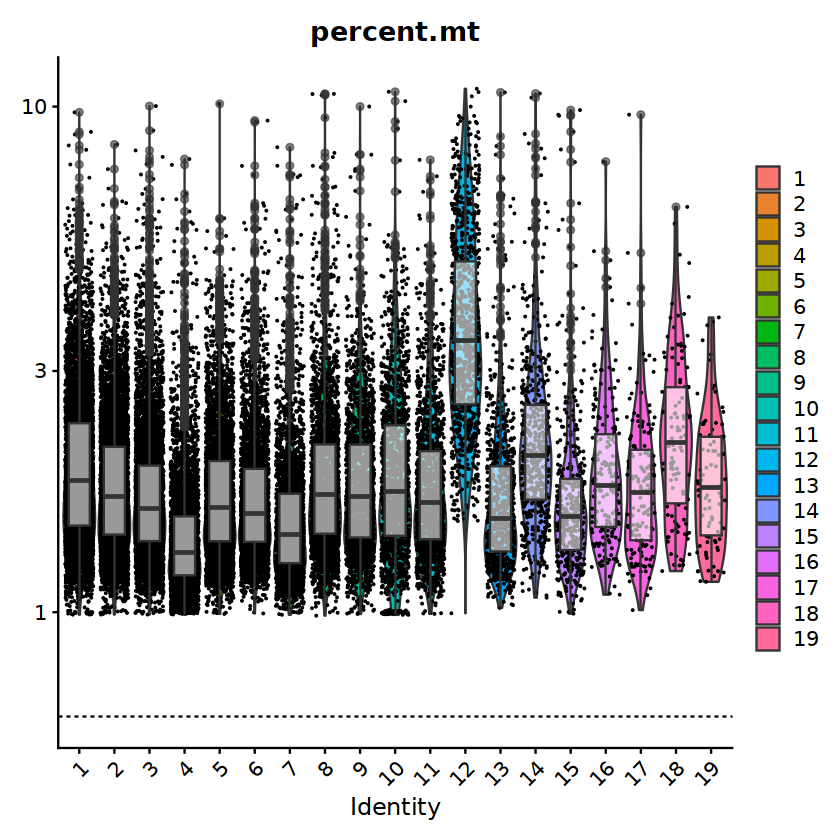

In [15]:
p10 <- VlnPlot(adata, features='percent.mt', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$percent.mt), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_percent.mt.png', width =2000, height = 500)
p10
dev.off()

## nCount_SCT

In [16]:
p10 <- VlnPlot(adata, features='nCount_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_SCT.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nFeature_SCT

In [17]:
p10 <- VlnPlot(adata, features='nFeature_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_SCT.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nCount_ATAC

In [18]:
p10 <- VlnPlot(adata, features='nCount_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_ATAC), linetype='dashed')


setwd(path_graphs)
png(file='Vln_nCount_ATAC.png', width =2000, height = 500)
p10
dev.off()



png 
  2

## nFeature_ATAC

In [19]:
####

p10 <- VlnPlot(adata, features='nFeature_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_RNA), linetype='dashed')

setwd(path_graphs)
png(file='Vln_nFeature_ATAC.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nCount_RNA

In [20]:
####

p10 <- VlnPlot(adata, features='nCount_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_RNA.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nFeature_RNA

In [21]:
####

p10 <- VlnPlot(adata, features='nFeature_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_RNA.png', width =2000, height = 500)
p10
dev.off()


png 
  2

## TSS.enrichment

In [22]:
####

p10 <- VlnPlot(adata, features='TSS.enrichment', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$TSS.enrichment), linetype='dashed')



setwd(path_graphs)
png(file='Vln_TSS.enrichment.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## amulet_nFrags

In [23]:
####

p10 <- VlnPlot(adata, features='amulet_nFrags', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$amulet_nFrags), linetype='dashed')



setwd(path_graphs)
png(file='Vln_amulet_nFrags.png', width =2000, height = 500)
p10
dev.off()


png 
  2

## scDblFinder.score

In [24]:
####

p10 <- VlnPlot(adata, features='scDblFinder.score', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$scDblFinder.score), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## scDblFinder.score_atac

In [25]:
####

p10 <- VlnPlot(adata, features='scDblFinder.score_atac', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$scDblFinder.score_atac), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score_atac.png', width =2000, height = 500)
p10
dev.off()

png 
  2

# Add genotyping from GEX not amplified alignment

## Diff1

In [17]:
diff1<-readRDS(file="/group/soranzo/manuel.tardaguila/2025_K562_multiome_reanalysis/deconvolute_LARRY/count_and_filter/Uniquely_genotyped_larry_barcodes_assignments.rds")

str(diff1)

'data.frame':	110712 obs. of  5 variables:
 $ sample           : Ord.factor w/ 4 levels "MCO_1278"<"MCO_1279"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ CellBC           : chr  "CB:Z:AAACCAACATTATGCG-1" "CB:Z:AAACGGATCAGCACCA-1" "CB:Z:AAACGTACAAGACTCC-1" "CB:Z:AAACGTACAAGGTAAC-1" ...
 $ GFPbc            : Ord.factor w/ 11 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ GFPbc_attribution: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Number_of_UMIS   : int  2 1 1 1 1 1 1 1 1 1 ...


In [18]:
df<-diff1


str(df)

'data.frame':	110712 obs. of  5 variables:
 $ sample           : Ord.factor w/ 4 levels "MCO_1278"<"MCO_1279"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ CellBC           : chr  "CB:Z:AAACCAACATTATGCG-1" "CB:Z:AAACGGATCAGCACCA-1" "CB:Z:AAACGTACAAGACTCC-1" "CB:Z:AAACGTACAAGGTAAC-1" ...
 $ GFPbc            : Ord.factor w/ 11 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ GFPbc_attribution: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Number_of_UMIS   : int  2 1 1 1 1 1 1 1 1 1 ...


In [19]:
# desired format MCO_01326_AAACAGCCACAGCCAT-1

df$CellID<-paste(df$sample,gsub("^[^:]+:[^:]+:","", df$CellBC),sep="_")

str(df)


'data.frame':	110712 obs. of  6 variables:
 $ sample           : Ord.factor w/ 4 levels "MCO_1278"<"MCO_1279"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ CellBC           : chr  "CB:Z:AAACCAACATTATGCG-1" "CB:Z:AAACGGATCAGCACCA-1" "CB:Z:AAACGTACAAGACTCC-1" "CB:Z:AAACGTACAAGGTAAC-1" ...
 $ GFPbc            : Ord.factor w/ 11 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ GFPbc_attribution: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Number_of_UMIS   : int  2 1 1 1 1 1 1 1 1 1 ...
 $ CellID           : chr  "MCO_1278_AAACCAACATTATGCG-1" "MCO_1278_AAACGGATCAGCACCA-1" "MCO_1278_AAACGTACAAGACTCC-1" "MCO_1278_AAACGTACAAGGTAAC-1" ...


## Filter to 2 UMIs

In [20]:
df_thresholded<-df[which(df$Number_of_UMIS >= 1 & df$GFPbc_attribution == 1),]

str(df_thresholded)

'data.frame':	110712 obs. of  6 variables:
 $ sample           : Ord.factor w/ 4 levels "MCO_1278"<"MCO_1279"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ CellBC           : chr  "CB:Z:AAACCAACATTATGCG-1" "CB:Z:AAACGGATCAGCACCA-1" "CB:Z:AAACGTACAAGACTCC-1" "CB:Z:AAACGTACAAGGTAAC-1" ...
 $ GFPbc            : Ord.factor w/ 11 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ GFPbc_attribution: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Number_of_UMIS   : int  2 1 1 1 1 1 1 1 1 1 ...
 $ CellID           : chr  "MCO_1278_AAACCAACATTATGCG-1" "MCO_1278_AAACGGATCAGCACCA-1" "MCO_1278_AAACGTACAAGACTCC-1" "MCO_1278_AAACGTACAAGGTAAC-1" ...


In [21]:
row.names(df_thresholded)<-df_thresholded$CellID

In [22]:
dim(df_thresholded)[1]

str(row.names(df_thresholded))

[1] 110712

 chr [1:110712] "MCO_1278_AAACCAACATTATGCG-1" "MCO_1278_AAACGGATCAGCACCA-1" ...


In [23]:
summary(as.factor(df_thresholded$GFPbc))

chrGFP_WTA      chrGFP_WTB      chrGFP_WTC  chrGFP_Del_287  chrGFP_Del_235 
           3229           11286            9934            7594            7610 
 chrGFP_Del_233 chrGFP_Del_16bp    chrGFP_KI_29    chrGFP_KI_27    chrGFP_KI_13 
          12727           24856             579            5784            6990 
     chrGFP_HET            NA's 
          15924            4199

## Add df_thresholded$GFPbc to adata

In [24]:
colnames(adata@meta.data)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "DBL_comb"                          "amulet_nFrags"                    
[47] "amulet_uniqFrags"                  "amulet_nAbove2"                   
[49] "amulet_total.nAbove2"              "amulet_p.value"                   
[51] "amulet_q.value"                    "doublet_amulet"                   
[53] "Diff"                              "doublet"                          
[55] "nCount_SCT"                        "nFeature_SCT"                     
[57] "SCT.weight"                        "ATAC.weight"                      
[59] "wsnn_res.2"                        "seurat_clusters"                  
[61] "wsnn_res.0.5"

In [25]:
# Remove the specified column from the metadata
adata@meta.data <- adata@meta.data[, !names(adata@meta.data) %in% c('No_assigned_GFPbc','Assigned_GFPbc','Assigned_GFPgenotype','Assignation_GEX_not_amplified')]

In [26]:
colnames(adata@meta.data)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "DBL_comb"                          "amulet_nFrags"                    
[47] "amulet_uniqFrags"                  "amulet_nAbove2"                   
[49] "amulet_total.nAbove2"              "amulet_p.value"                   
[51] "amulet_q.value"                    "doublet_amulet"                   
[53] "Diff"                              "doublet"                          
[55] "nCount_SCT"                        "nFeature_SCT"                     
[57] "SCT.weight"                        "ATAC.weight"                      
[59] "wsnn_res.2"                        "seurat_clusters"                  
[61] "wsnn_res.0.5"

In [27]:
str(df_thresholded)
summary(as.factor(df_thresholded$GFPbc))

'data.frame':	110712 obs. of  6 variables:
 $ sample           : Ord.factor w/ 4 levels "MCO_1278"<"MCO_1279"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ CellBC           : chr  "CB:Z:AAACCAACATTATGCG-1" "CB:Z:AAACGGATCAGCACCA-1" "CB:Z:AAACGTACAAGACTCC-1" "CB:Z:AAACGTACAAGGTAAC-1" ...
 $ GFPbc            : Ord.factor w/ 11 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ GFPbc_attribution: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Number_of_UMIS   : int  2 1 1 1 1 1 1 1 1 1 ...
 $ CellID           : chr  "MCO_1278_AAACCAACATTATGCG-1" "MCO_1278_AAACGGATCAGCACCA-1" "MCO_1278_AAACGTACAAGACTCC-1" "MCO_1278_AAACGTACAAGGTAAC-1" ...


chrGFP_WTA      chrGFP_WTB      chrGFP_WTC  chrGFP_Del_287  chrGFP_Del_235 
           3229           11286            9934            7594            7610 
 chrGFP_Del_233 chrGFP_Del_16bp    chrGFP_KI_29    chrGFP_KI_27    chrGFP_KI_13 
          12727           24856             579            5784            6990 
     chrGFP_HET            NA's 
          15924            4199

In [28]:
adata@meta.data$Assignation_GEX_not_amplified<-NA

In [29]:
gfp1      = setNames(as.character(df_thresholded$GFPbc), 
                       df_thresholded$CellID)
  
  cat("gfp1_0\n")
  cat(str(gfp1))
  cat("\n")

gfp1_0
 Named chr [1:110712] "chrGFP_WTA" "chrGFP_WTA" "chrGFP_WTA" "chrGFP_WTA" ...
 - attr(*, "names")= chr [1:110712] "MCO_1278_AAACCAACATTATGCG-1" "MCO_1278_AAACGGATCAGCACCA-1" "MCO_1278_AAACGTACAAGACTCC-1" "MCO_1278_AAACGTACAAGGTAAC-1" ...



In [30]:
adata@meta.data$Assignation_GEX_not_amplified = gfp1[rownames(adata@meta.data)]


In [31]:
summary(as.factor(adata@meta.data$Assignation_GEX_not_amplified))

chrGFP_Del_16bp  chrGFP_Del_233  chrGFP_Del_235  chrGFP_Del_287      chrGFP_HET 
           1937             970             599             668            1600 
   chrGFP_KI_13    chrGFP_KI_27    chrGFP_KI_29      chrGFP_WTA      chrGFP_WTB 
            579             451              46             287            1370 
     chrGFP_WTC            NA's 
            915           33141

In [32]:
adata@meta.data$Assignation_GEX_not_amplified<-factor(adata@meta.data$Assignation_GEX_not_amplified,
                                       levels = c("chrGFP_WTA","chrGFP_WTB","chrGFP_WTC",
                                                  "chrGFP_HET",
                                                  "chrGFP_KI_13","chrGFP_KI_27","chrGFP_KI_29",
                                                  "chrGFP_Del_16bp",
                                                  "chrGFP_Del_233","chrGFP_Del_235","chrGFP_Del_287"),
                                       ordered=T)

In [33]:
summary(as.factor(adata@meta.data$Assignation_GEX_not_amplified))

chrGFP_WTA      chrGFP_WTB      chrGFP_WTC      chrGFP_HET    chrGFP_KI_13 
            287            1370             915            1600             579 
   chrGFP_KI_27    chrGFP_KI_29 chrGFP_Del_16bp  chrGFP_Del_233  chrGFP_Del_235 
            451              46            1937             970             599 
 chrGFP_Del_287            NA's 
            668           33141

In [34]:
colnames(adata@meta.data)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "DBL_comb"                          "amulet_nFrags"                    
[47] "amulet_uniqFrags"                  "amulet_nAbove2"                   
[49] "amulet_total.nAbove2"              "amulet_p.value"                   
[51] "amulet_q.value"                    "doublet_amulet"                   
[53] "Diff"                              "doublet"                          
[55] "nCount_SCT"                        "nFeature_SCT"                     
[57] "SCT.weight"                        "ATAC.weight"                      
[59] "wsnn_res.2"                        "seurat_clusters"                  
[61] "wsnn_res.0.5"                      "Assignation_GEX_not_amplified"

# Add time_point and factor diff and Integrated_annotation

In [58]:
adata@meta.data$time_point<-adata@meta.data$orig.ident

In [59]:
summary(as.factor(adata@meta.data$time_point))

MCO_1278 MCO_1279 MCO_1280 MCO_1281 
    8832    10230    14245     9256

In [60]:
adata@meta.data$time_point[which(adata@meta.data$time_point == "MCO_1278")]<-'24_hours'
adata@meta.data$time_point[which(adata@meta.data$time_point == "MCO_1279")]<-'48_hours'
adata@meta.data$time_point[which(adata@meta.data$time_point == "MCO_1280")]<-'72_hours'
adata@meta.data$time_point[which(adata@meta.data$time_point == "MCO_1281")]<-'96_hours'


In [61]:
adata@meta.data$time_point<-factor(adata@meta.data$time_point,
                                       levels = c("24_hours","48_hours","72_hours",
                                                  "96_hours"),
                                       ordered=T)

summary(adata@meta.data$time_point)

24_hours 48_hours 72_hours 96_hours 
    8832    10230    14245     9256

In [62]:
summary(as.factor(adata@meta.data$Diff))

Diff_K562 
    42563

In [63]:
adata@meta.data$Diff<-factor(adata@meta.data$Diff,
                                       levels = c("Diff_K562"),
                                       ordered=T)

summary(adata@meta.data$Diff)

Diff_K562 
    42563

# Cell annotation

## Dotplot on marker genes

In [64]:
markers<-c(c('IL33','IL1B','CCR7'),c('GYPA','HBA2','HBZ'),c('ITGA2B','GP1BA', 'GP1BB'),c('FYB1','GP6','STIL'),c('TUBB1','CDKN2D','MAPK14'))

markers

[1] "IL33"   "IL1B"   "CCR7"   "GYPA"   "HBA2"   "HBZ"    "ITGA2B" "GP1BA" 
 [9] "GP1BB"  "FYB1"   "GP6"    "STIL"   "TUBB1"  "CDKN2D" "MAPK14"

png 
  2

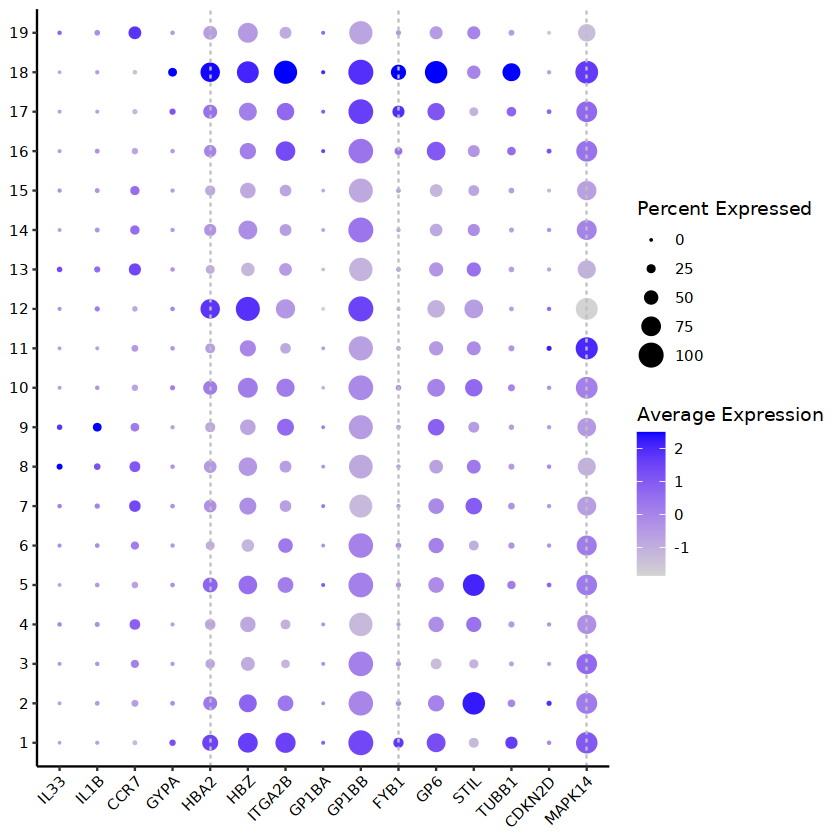

In [65]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="seurat_clusters")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Integrated_annotation_THREE.png', width =1000)
dotplot3
dev.off()

## Barplot time vs cluster

In [66]:
met<-adata[[]]

In [67]:
colnames(met)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "DBL_comb"                          "amulet_nFrags"                    
[47] "amulet_uniqFrags"                  "amulet_nAbove2"                   
[49] "amulet_total.nAbove2"              "amulet_p.value"                   
[51] "amulet_q.value"                    "doublet_amulet"                   
[53] "Diff"                              "doublet"                          
[55] "nCount_SCT"                        "nFeature_SCT"                     
[57] "SCT.weight"                        "ATAC.weight"                      
[59] "wsnn_res.2"                        "seurat_clusters"                  
[61] "wsnn_res.0.5"                      "Assignation_GEX_not_amplified"    
[63] "time_point"

In [68]:
met.dt<-data.table(met,key=c("Assignation_GEX_not_amplified","seurat_clusters",'time_point'))

In [69]:
#str(met.dt)

In [70]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [71]:
met.dt<-data.table(met, key=c("Assignation_GEX_not_amplified",'time_point'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [72]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Assignation_GEX_not_amplified",'time_point'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [73]:
str(Freq.table)

'data.frame':	707 obs. of  6 variables:
 $ Assignation_GEX_not_amplified: Ord.factor w/ 11 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 8 8 8 8 8 8 8 8 8 8 ...
 $ time_point                   : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters              : Factor w/ 19 levels "1","2","3","4",..: 1 11 15 5 2 12 16 6 3 13 ...
 $ Freq                         : int  16 32 1 12 10 8 2 40 46 21 ...
 $ TOTAL                        : int  436 436 436 436 436 436 436 436 436 436 ...
 $ Perc                         : num  3.67 7.34 0.23 2.75 2.29 ...


In [74]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      5     115     210    1097     446   10048 

In [75]:
met.dt<-data.table(met, key=c("Assignation_GEX_not_amplified"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_genotypes=.N),by=key(met.dt)], stringsAsFactors=F)



In [76]:
str(Freq.table_CT_annotation)

'data.frame':	12 obs. of  2 variables:
 $ Assignation_GEX_not_amplified: Ord.factor w/ 11 levels "chrGFP_WTA"<"chrGFP_WTB"<..: NA 1 2 3 4 5 6 7 8 9 ...
 $ Freq_genotypes               : int  33141 287 1370 915 1600 579 451 46 1937 970 ...


### Filter x axis by frequency

In [77]:
Freq.table_filtered<-Freq.table#[which(Freq.table$TOTAL >= 100),]


str(Freq.table_filtered)

'data.frame':	707 obs. of  6 variables:
 $ Assignation_GEX_not_amplified: Ord.factor w/ 11 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 8 8 8 8 8 8 8 8 8 8 ...
 $ time_point                   : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters              : Factor w/ 19 levels "1","2","3","4",..: 1 11 15 5 2 12 16 6 3 13 ...
 $ Freq                         : int  16 32 1 12 10 8 2 40 46 21 ...
 $ TOTAL                        : int  436 436 436 436 436 436 436 436 436 436 ...
 $ Perc                         : num  3.67 7.34 0.23 2.75 2.29 ...


In [79]:
vector_colors_seurat_clusters<-c(brewer.pal(9, "Set1"),brewer.pal(12, "Set3"),"white")


length(vector_colors_seurat_clusters)

[1] 22

-------------------------------------->	0 25 50 75 100


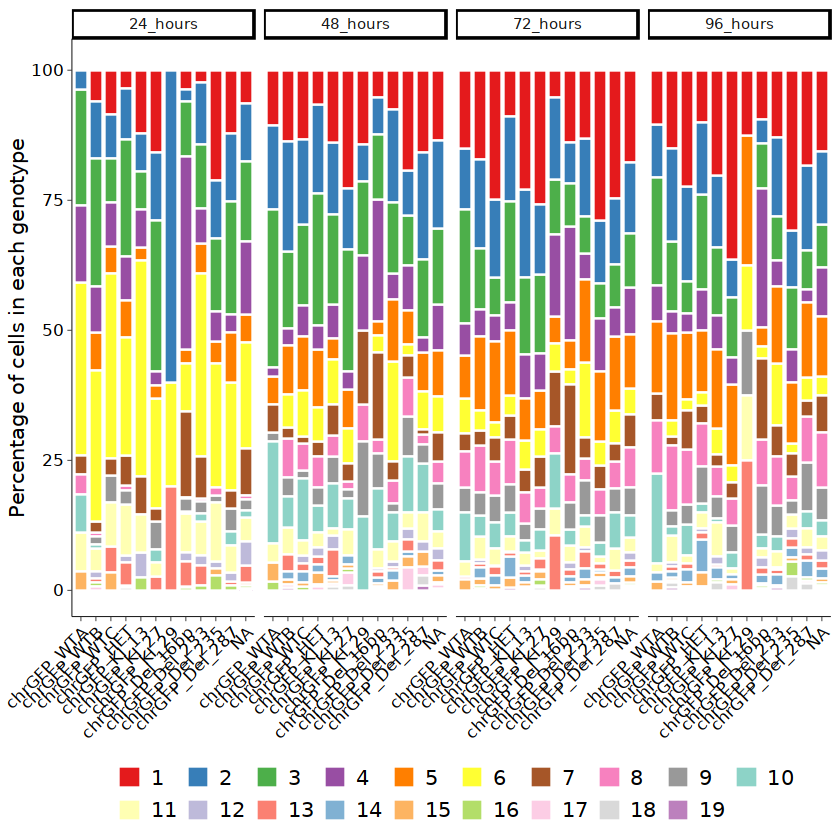

In [82]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=Assignation_GEX_not_amplified, y=Perc, fill=seurat_clusters)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each genotype",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_seurat_clusters,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ time_point, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=2,byrow=TRUE))



stacked_barplot
  




  

In [83]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_genotyped_plus_NA_vs_cluster_and_time_point",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

## new barplot

In [97]:
met<-adata[[]]

In [98]:
colnames(met)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "DBL_comb"                          "amulet_nFrags"                    
[47] "amulet_uniqFrags"                  "amulet_nAbove2"                   
[49] "amulet_total.nAbove2"              "amulet_p.value"                   
[51] "amulet_q.value"                    "doublet_amulet"                   
[53] "Diff"                              "doublet"                          
[55] "nCount_SCT"                        "nFeature_SCT"                     
[57] "SCT.weight"                        "ATAC.weight"                      
[59] "wsnn_res.2"                        "seurat_clusters"                  
[61] "wsnn_res.0.5"                      "Assignation_GEX_not_amplified"    
[63] "time_point"

In [99]:
met.dt<-data.table(met,key=c("Assignation_GEX_not_amplified","seurat_clusters",'time_point'))

In [100]:
#str(met.dt)

In [101]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [102]:
met.dt<-data.table(met, key=c("Assignation_GEX_not_amplified",'time_point'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [103]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Assignation_GEX_not_amplified",'time_point'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [104]:
str(Freq.table)

'data.frame':	707 obs. of  6 variables:
 $ Assignation_GEX_not_amplified: Ord.factor w/ 11 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 8 8 8 8 8 8 8 8 8 8 ...
 $ time_point                   : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters              : Factor w/ 19 levels "1","2","3","4",..: 1 11 15 5 2 12 16 6 3 13 ...
 $ Freq                         : int  16 32 1 12 10 8 2 40 46 21 ...
 $ TOTAL                        : int  436 436 436 436 436 436 436 436 436 436 ...
 $ Perc                         : num  3.67 7.34 0.23 2.75 2.29 ...


In [105]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      5     115     210    1097     446   10048 

In [106]:
met.dt<-data.table(met, key=c("Assignation_GEX_not_amplified"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_genotypes=.N),by=key(met.dt)], stringsAsFactors=F)



In [107]:
str(Freq.table_CT_annotation)

'data.frame':	12 obs. of  2 variables:
 $ Assignation_GEX_not_amplified: Ord.factor w/ 11 levels "chrGFP_WTA"<"chrGFP_WTB"<..: NA 1 2 3 4 5 6 7 8 9 ...
 $ Freq_genotypes               : int  33141 287 1370 915 1600 579 451 46 1937 970 ...


In [108]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by=c("Assignation_GEX_not_amplified"))

### Filter x axis by frequency

In [109]:
Freq.table_filtered<-Freq.table#[which(Freq.table$TOTAL >= 100),]


str(Freq.table_filtered)

'data.frame':	707 obs. of  7 variables:
 $ Assignation_GEX_not_amplified: Ord.factor w/ 11 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 8 8 8 8 8 8 8 8 8 8 ...
 $ time_point                   : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters              : Factor w/ 19 levels "1","2","3","4",..: 1 11 15 5 2 12 16 6 3 13 ...
 $ Freq                         : int  16 32 1 12 10 8 2 40 46 21 ...
 $ TOTAL                        : int  436 436 436 436 436 436 436 436 436 436 ...
 $ Perc                         : num  3.67 7.34 0.23 2.75 2.29 ...
 $ Freq_genotypes               : int  1937 1937 1937 1937 1937 1937 1937 1937 1937 1937 ...


In [110]:
vector_colors_seurat_clusters<-c(brewer.pal(9, "Set1"),brewer.pal(12, "Set3"),"white")


length(vector_colors_seurat_clusters)

[1] 22

-------------------------------------->	0 25 50 75 100


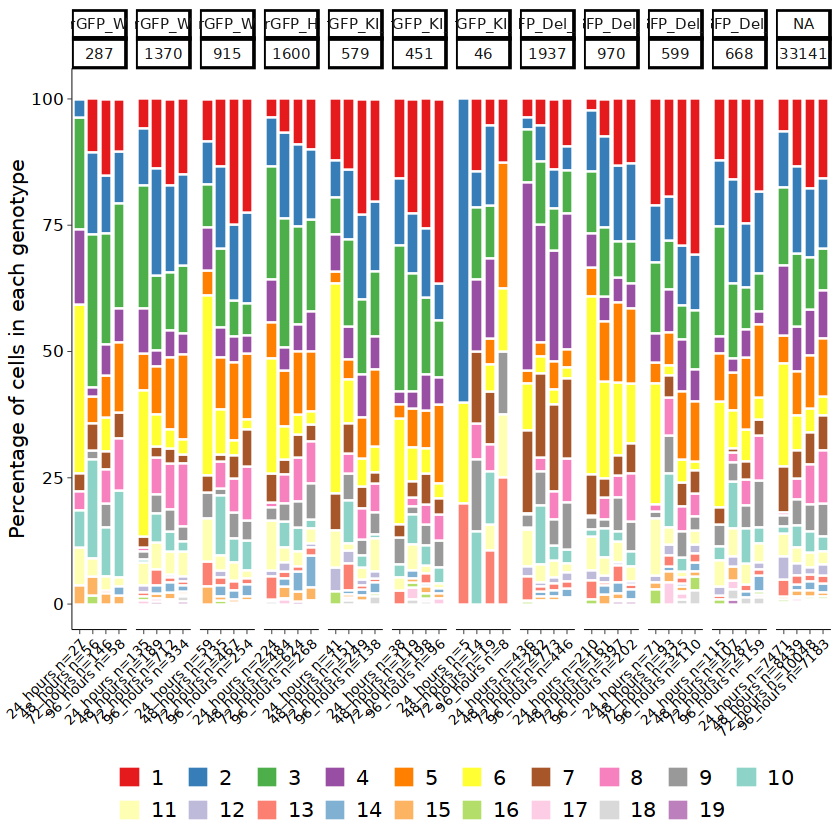

In [113]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<- Freq.table_filtered %>%
     mutate(myaxis = paste0(time_point," ","n=", TOTAL), drop=T) %>%
     mutate(myaxis=fct_reorder(myaxis,as.numeric(time_point)), drop=T) %>%
        ggplot(aes(x=myaxis, y=Perc, fill=seurat_clusters)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each genotype",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_seurat_clusters,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ Assignation_GEX_not_amplified+Freq_genotypes, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=2,byrow=TRUE))



stacked_barplot
  




  

In [114]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_genotyped_plus_NA_vs_cluster_and_time_point_OTHER",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

# Save the genotyped object

In [115]:
setwd("/group/soranzo/manuel.tardaguila/2025_K562_multiome_reanalysis/processing_outputs/")

In [116]:
saveRDS(adata, file="merged_unprocessed_db_filt_clustered_QCed_reclustered_genotyped.rds")

In [118]:
colnames(adata@meta.data)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "DBL_comb"                          "amulet_nFrags"                    
[47] "amulet_uniqFrags"                  "amulet_nAbove2"                   
[49] "amulet_total.nAbove2"              "amulet_p.value"                   
[51] "amulet_q.value"                    "doublet_amulet"                   
[53] "Diff"                              "doublet"                          
[55] "nCount_SCT"                        "nFeature_SCT"                     
[57] "SCT.weight"                        "ATAC.weight"                      
[59] "wsnn_res.2"                        "seurat_clusters"                  
[61] "wsnn_res.0.5"                      "Assignation_GEX_not_amplified"    
[63] "time_point"